# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


635

In [4]:

cities_df=pd.DataFrame({"Cities":cities})
cities_df
cities_df["Cloudiness"]=""
cities_df["Country"]=""
cities_df["Date"]=""
cities_df["Humidity"]=""
cities_df["Lat"]=""
cities_df["Lng"]=""
cities_df["Max Temp"]=""
cities_df["Wind speed"]=""
cities_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind speed
0,ushuaia,,,,,,,,
1,tiksi,,,,,,,,
2,qaanaaq,,,,,,,,
3,kapaa,,,,,,,,
4,kahului,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
base_url="http://api.openweathermap.org/data/2.5/weather?"
print("Beginning Data Retrieval")
print("-"*20)
for index,row in cities_df.iterrows():
    city_name=row["Cities"]
    qurey_url=f"{base_url}appid={api_key}&units=imperial&q="+city_name
    response=requests.get(qurey_url).json()
    try:
        print(f"Processing Record {index%50} of Set {index//50+1} | {city_name}")
        print(qurey_url)
        cities_df.loc[index,"Cloudiness"]=response["clouds"]["all"]
        cities_df.loc[index,"Country"]=response["sys"]["country"]
        cities_df.loc[index,"Date"]=response["dt"]
        cities_df.loc[index,"Humidity"]=response["main"]["humidity"]
        cities_df.loc[index,"Lat"]=response["coord"]["lat"]
        cities_df.loc[index,"Lng"]=response["coord"]["lon"]
        cities_df.loc[index,"Max Temp"]=response["main"]["temp_max"]
        cities_df.loc[index,"Wind speed"]=response["wind"]["speed"]
    except (KeyError,IndexError):
        print("City not found. Skipping...")
              

print("-"*40)            
print("Data Retrieval Complete")  
print("-"*40)


Beginning Data Retrieval
--------------------
Processing Record 0 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=ushuaia
Processing Record 1 of Set 1 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=tiksi
Processing Record 2 of Set 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=qaanaaq
Processing Record 3 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=kapaa
Processing Record 4 of Set 1 | kahului
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=kahului
Processing Record 5 of Set 1 | pevek
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=pevek
Processing Record 6 of Set 1 | ust-maya
http://api.openweathermap.

Processing Record 2 of Set 2 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=jamestown
Processing Record 3 of Set 2 | imelda
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=imelda
Processing Record 4 of Set 2 | inuvik
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=inuvik
Processing Record 5 of Set 2 | gamboma
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=gamboma
Processing Record 6 of Set 2 | cockburn town
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=cockburn town
Processing Record 7 of Set 2 | safwah
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=safwah
City not found. Skipping...
Processing Record 8 of Set 2 | chiusi
http://api.openweatherma

Processing Record 6 of Set 3 | ixtapa
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=ixtapa
Processing Record 7 of Set 3 | lolua
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=lolua
City not found. Skipping...
Processing Record 8 of Set 3 | xining
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=xining
Processing Record 9 of Set 3 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=palabuhanratu
City not found. Skipping...
Processing Record 10 of Set 3 | macedo de cavaleiros
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=macedo de cavaleiros
Processing Record 11 of Set 3 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=port elizabet

Processing Record 8 of Set 4 | esperance
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=esperance
Processing Record 9 of Set 4 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=petropavlovsk-kamchatskiy
Processing Record 10 of Set 4 | buariki
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=buariki
City not found. Skipping...
Processing Record 11 of Set 4 | ibotirama
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=ibotirama
Processing Record 12 of Set 4 | ouahigouya
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=ouahigouya
Processing Record 13 of Set 4 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=umzimvubu
City not found

Processing Record 10 of Set 5 | iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=iqaluit
Processing Record 11 of Set 5 | yulara
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=yulara
Processing Record 12 of Set 5 | port blair
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=port blair
Processing Record 13 of Set 5 | anrochte
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=anrochte
Processing Record 14 of Set 5 | fujin
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=fujin
Processing Record 15 of Set 5 | miedzychod
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=miedzychod
Processing Record 16 of Set 5 | bolungarvik
http://api.openweathermap.org/data/2.5/wea

Processing Record 13 of Set 6 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=attawapiskat
City not found. Skipping...
Processing Record 14 of Set 6 | manadhoo
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=manadhoo
Processing Record 15 of Set 6 | havoysund
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=havoysund
Processing Record 16 of Set 6 | bay city
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=bay city
Processing Record 17 of Set 6 | constitucion
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=constitucion
Processing Record 18 of Set 6 | liseleje
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=liseleje
Processing Record 19 of Set 6 | naze

Processing Record 16 of Set 7 | vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=vaitupu
City not found. Skipping...
Processing Record 17 of Set 7 | camacha
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=camacha
Processing Record 18 of Set 7 | sobolevo
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=sobolevo
Processing Record 19 of Set 7 | sorland
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=sorland
Processing Record 20 of Set 7 | mehamn
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=mehamn
Processing Record 21 of Set 7 | yirol
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=yirol
City not found. Skipping...
Processing Record 22 of Set 7 | kavieng
ht

Processing Record 18 of Set 8 | canutama
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=canutama
Processing Record 19 of Set 8 | narva-joesuu
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=narva-joesuu
Processing Record 20 of Set 8 | shelburne
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=shelburne
Processing Record 21 of Set 8 | mednogorskiy
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=mednogorskiy
Processing Record 22 of Set 8 | juba
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=juba
Processing Record 23 of Set 8 | yumbel
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=yumbel
Processing Record 24 of Set 8 | koboldo
http://api.openweathermap.org/data/2

Processing Record 20 of Set 9 | moramanga
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=moramanga
Processing Record 21 of Set 9 | byron bay
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=byron bay
Processing Record 22 of Set 9 | jamkhandi
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=jamkhandi
Processing Record 23 of Set 9 | fevralsk
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=fevralsk
City not found. Skipping...
Processing Record 24 of Set 9 | busilac
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=busilac
Processing Record 25 of Set 9 | tongliao
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=tongliao
Processing Record 26 of Set 9 | coro
http://api.op

Processing Record 23 of Set 10 | progreso
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=progreso
Processing Record 24 of Set 10 | lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=lazaro cardenas
Processing Record 25 of Set 10 | grand centre
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=grand centre
City not found. Skipping...
Processing Record 26 of Set 10 | setermoen
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=setermoen
Processing Record 27 of Set 10 | freeport
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=freeport
Processing Record 28 of Set 10 | siogui abajo
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=siogui abajo
Processing Recor

Processing Record 26 of Set 11 | todos santos
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=todos santos
Processing Record 27 of Set 11 | keetmanshoop
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=keetmanshoop
Processing Record 28 of Set 11 | elizabethtown
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=elizabethtown
Processing Record 29 of Set 11 | pecos
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=pecos
Processing Record 30 of Set 11 | conceicao da barra
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=conceicao da barra
Processing Record 31 of Set 11 | tautira
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=tautira
Processing Record 32 of Set 11 | binge

Processing Record 30 of Set 12 | nehe
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=nehe
Processing Record 31 of Set 12 | severnyy
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=severnyy
City not found. Skipping...
Processing Record 32 of Set 12 | noshiro
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=noshiro
Processing Record 33 of Set 12 | kuching
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=kuching
Processing Record 34 of Set 12 | varberg
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=varberg
Processing Record 35 of Set 12 | bay roberts
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=bay roberts
Processing Record 36 of Set 12 | deskati
http://api.open

Processing Record 33 of Set 13 | candido mendes
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=candido mendes
Processing Record 34 of Set 13 | tulu bolo
http://api.openweathermap.org/data/2.5/weather?appid=014a679a536ad97241d662c5f51d076f&units=imperial&q=tulu bolo
----------------------------------------
Data Retrieval Complete
----------------------------------------


In [47]:
cities_df.to_csv("RandomData.csv")

In [18]:
df = pd.read_csv('RandomData.csv')
df.head(20)

,Unnamed: 0,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind speed
0,0,ushuaia,75.0,AR,1.538348e+09,86.0,-54.81,-68.31,33.80,25.28
1,1,tiksi,24.0,RU,1.538351e+09,97.0,71.64,128.87,26.22,3.18
2,2,qaanaaq,0.0,GL,1.538351e+09,100.0,77.48,-69.36,10.74,7.31
3,3,kapaa,90.0,US,1.538350e+09,90.0,22.08,-159.32,82.04,5.82
4,4,kahului,20.0,US,1.538348e+09,59.0,20.89,-156.47,89.96,23.04
5,5,pevek,36.0,RU,1.538351e+09,77.0,69.70,170.27,50.70,17.72
6,6,ust-maya,12.0,RU,1.538351e+09,64.0,60.42,134.54,33.42,4.97
7,7,bullhead city,1.0,US,1.538350e+09,40.0,35.15,-114.57,98.96,18.34
8,8,ormara,0.0,PK,1.538351e+09,89.0,25.21,64.64,77.70,11.79
9,9,phek,64.0,IN,1.538351e+09,90.0,25.70,94.46,68.25,2.17


In [20]:
df.count()

Unnamed: 0    635
Cities        635
Cloudiness    564
Country       558
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind speed    564
dtype: int64

In [21]:
final_df=df.dropna(how="any")
final_df

,Unnamed: 0,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind speed
0,0,ushuaia,75.0,AR,1.538348e+09,86.0,-54.81,-68.31,33.80,25.28
1,1,tiksi,24.0,RU,1.538351e+09,97.0,71.64,128.87,26.22,3.18
2,2,qaanaaq,0.0,GL,1.538351e+09,100.0,77.48,-69.36,10.74,7.31
3,3,kapaa,90.0,US,1.538350e+09,90.0,22.08,-159.32,82.04,5.82
4,4,kahului,20.0,US,1.538348e+09,59.0,20.89,-156.47,89.96,23.04
5,5,pevek,36.0,RU,1.538351e+09,77.0,69.70,170.27,50.70,17.72
6,6,ust-maya,12.0,RU,1.538351e+09,64.0,60.42,134.54,33.42,4.97
7,7,bullhead city,1.0,US,1.538350e+09,40.0,35.15,-114.57,98.96,18.34
8,8,ormara,0.0,PK,1.538351e+09,89.0,25.21,64.64,77.70,11.79
9,9,phek,64.0,IN,1.538351e+09,90.0,25.70,94.46,68.25,2.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

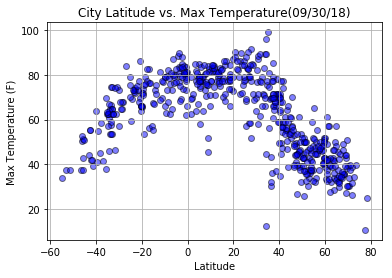

In [29]:
plt.scatter(final_df["Lat"], final_df["Max Temp"], marker="o",facecolors="blue", edgecolors="black", alpha=0.5)
plt.title("City Latitude vs. Max Temperature(09/30/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("TempLat.png")
plt.show()

#### Latitude vs. Humidity Plot

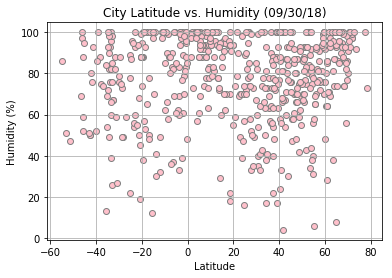

In [41]:
plt.scatter(final_df["Lat"], final_df["Humidity"], marker="o",facecolors="pink", edgecolors="grey", alpha=1)
plt.title("City Latitude vs. Humidity (09/30/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("TempHum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

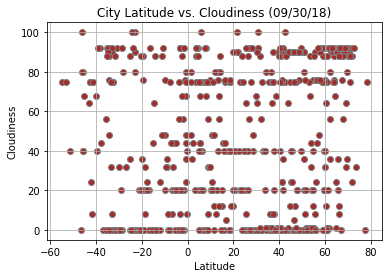

In [45]:
plt.scatter(final_df["Lat"], final_df["Cloudiness"], marker="o",facecolors="brown", edgecolors="grey", alpha=1)
plt.title("City Latitude vs. Cloudiness (09/30/18)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("TempClou.png")
plt.show()

#### Latitude vs. Wind Speed Plot

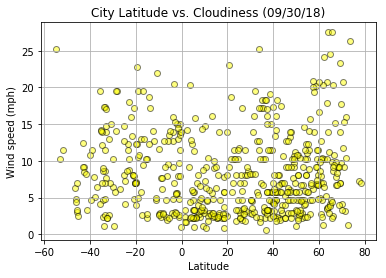

In [35]:
plt.scatter(final_df["Lat"], final_df["Wind speed"], marker="o",facecolors="yellow", edgecolors="black", alpha=0.5)
plt.title("City Latitude vs. Cloudiness (09/30/18)")
plt.ylabel("Wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("TempWind.png")
plt.show()